#### import modules and packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime as dt

from onc.onc import ONC

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from collections import Counter
from pylab import rcParams
from kneed import KneeLocator


rcParams['figure.figsize'] = 14,6

%matplotlib inline

#### Load data

(754304, 2)

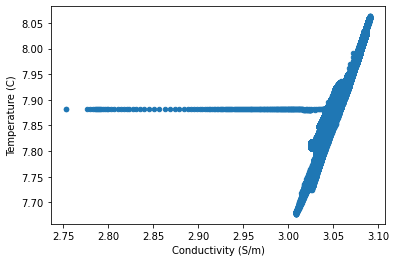

In [2]:
df = pd.read_csv('BaynesSoundMooring_40mbss_ConductivityTemperatureDepth_20200305T000000Z_20200313T210509Z-NaN.csv',skipinitialspace=True)
df.rename(columns={df.columns[0]: 'UTC time', df.columns[1]: 'Conductivity (S/m)',df.columns[15]: 'Temperature (C)'},inplace=True)

fig = df.plot.scatter(x='Conductivity (S/m)',y='Temperature (C)')

df = df.iloc[:,[1,15]].values
df.shape

#### Preparing DBSCAN model ( train model and identify outliers)

Text(0.5, 0, 'Number of clusters')

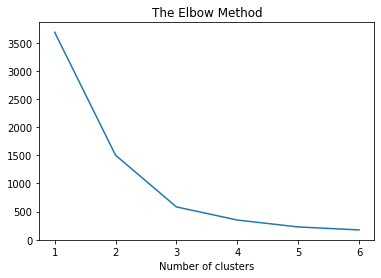

In [3]:
# How many possible clusters?
from sklearn.cluster import KMeans

Km = []
for i in range(1,7):
    kmeans = KMeans(n_clusters = i,
                   init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(df)
    Km.append(kmeans.inertia_)
plt.plot(range(1,7),Km)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")

#### Tuning parameters for DBSCAN

The argument 'eps' is the distance between two samples to be considered as a neighborhood and 'min_samples' is the number of samples in a neighborhood.

In [43]:
db1 = DBSCAN(eps= 0.00001, min_samples= 50).fit(df)
labels = db1.labels_
len(set(labels))

17

In [44]:
Counter(labels)

Counter({-1: 753301,
         0: 50,
         1: 84,
         2: 50,
         3: 52,
         4: 94,
         5: 67,
         6: 83,
         7: 51,
         8: 65,
         9: 67,
         10: 52,
         11: 66,
         12: 65,
         13: 50,
         14: 56,
         15: 51})

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df)

In [46]:
db2 = DBSCAN(eps= 0.00001, min_samples= 50).fit(df1)
labels = db2.labels_
len(set(labels))

5

In [47]:
Counter(labels)

Counter({-1: 754093, 0: 50, 1: 60, 2: 50, 3: 51})

In [51]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components= 3)

gma = gmm.fit(df1)

In [53]:
labels = gma.predict(df1)
frame = pd.DataFrame(df1)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

In [55]:
set(frame['cluster'])

{0, 1, 2}

In [56]:
gmb = gmm.fit(df)
labels = gmb.predict(df)
frame = pd.DataFrame(df)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

In [57]:
set(frame['cluster'])

{0, 1, 2}

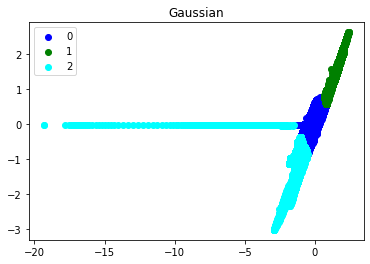

In [69]:
color=['blue','green','cyan']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k],
               label = k)

plt.legend(loc="upper left")
plt.title('Gaussian')

plt.show()

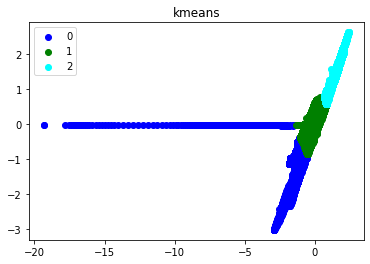

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df1)

#predictions from kmeans
pred = kmeans.predict(df1)
frame = pd.DataFrame(df1)
frame['cluster'] = pred
frame.columns = ['Weight', 'Height', 'cluster']

#plotting results
color=['blue','green','cyan']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k],label =k)
    
plt.legend(loc="upper left")
plt.title('kmeans')

plt.show()

In [ ]:
# Plotting various clusters
plt.scatter(df1[db1.labels_ == 0, 0],
            df1[db1.labels_ == 0, 1],
            c = "red",
           label = "Cluster 1")

plt.scatter(df1[db1.labels_ == 1, 0],
            df1[db1.labels_ == 1, 1],
            c = "magenta",
           label = "Cluster 2")

plt.scatter(df1[db1.labels_ == 2, 0],
            df1[db1.labels_ == 2, 1],
            c = "green",
           label = "Cluster 3")

plt.scatter(df1[db1.labels_ == 3, 0],
            df1[db1.labels_ == 3, 1],
            c = "brown",
           label = "Cluster 4")


plt.scatter(df1[db1.labels_ == -1, 0],
            df1[db1.labels_ == -1, 1],
            c = "orange",
           label = "OutLiers")

# Plotting legend
plt.legend()

# Setting the title of the Plot
plt.title("Clustering based on C & T")

# Disabling x axis & y axis labels
plt.xticks([])
plt.yticks([])

# Plotting the plot
plt.show()